In [113]:
words = open('lines.txt', 'r').read().splitlines()

In [114]:
words[:10]

["delicate savage / you'll never hold the cinder / but still you will burn $",
 'our destination / the skyline of this city / shining horizon $',
 'a splash and a cry /  words pulled from the riverside /  dried in the hot sun $',
 'hurt but poised for war / sturdy in crestfallen slumps / warrior spirit $',
 'steamy mist rising / rocks receiving downward crash / as the jungle weeps $',
 'a sultry wine night /  spent with a beautiful girl /  brash kiss ends smooth jazz $',
 'you were broken glass / but i touched you even though / i knew it would hurt $',
 'say not that i have / fled from the world but that the / world has fled from me $',
 'eyes dance with firelight / the moon and i are lovers / the spiteful sun dies $',
 'i woke up today / i wanted to write a song / i wrote a haiku $']

In [115]:
words = [wr.replace("/", "").replace("$", "") for wr in words]
words[:10]

["delicate savage  you'll never hold the cinder  but still you will burn ",
 'our destination  the skyline of this city  shining horizon ',
 'a splash and a cry   words pulled from the riverside   dried in the hot sun ',
 'hurt but poised for war  sturdy in crestfallen slumps  warrior spirit ',
 'steamy mist rising  rocks receiving downward crash  as the jungle weeps ',
 'a sultry wine night   spent with a beautiful girl   brash kiss ends smooth jazz ',
 'you were broken glass  but i touched you even though  i knew it would hurt ',
 'say not that i have  fled from the world but that the  world has fled from me ',
 'eyes dance with firelight  the moon and i are lovers  the spiteful sun dies ',
 'i woke up today  i wanted to write a song  i wrote a haiku ']

In [116]:
len(words)

11269

In [117]:
min([len(w) for w in words]), max([len(w) for w in words])

(22, 120)

In [354]:
import torch

N = torch.zeros(45, 45)

In [385]:
chars = sorted(list(set(''.join(words)))) + ["<S>", "<M>", "<E>"]
stoi = {ch: i for i, ch in enumerate(chars)}

In [386]:
stoi

{' ': 0,
 "'": 1,
 ',': 2,
 '.': 3,
 'a': 4,
 'b': 5,
 'c': 6,
 'd': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'h': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'p': 19,
 'q': 20,
 'r': 21,
 's': 22,
 't': 23,
 'u': 24,
 'v': 25,
 'w': 26,
 'x': 27,
 'y': 28,
 'z': 29,
 'ß': 30,
 'à': 31,
 'ä': 32,
 'ç': 33,
 'è': 34,
 'é': 35,
 'ï': 36,
 'ñ': 37,
 'ó': 38,
 'ö': 39,
 'ü': 40,
 'ā': 41,
 '<S>': 42,
 '<M>': 43,
 '<E>': 44}

In [356]:
print(len(chars))

45


In [357]:
for w in words:
    w = w.split("  ")
    chs = ["<S>"] + list(w[0]) + ["<M>"] + list(w[1])+ ["<M>"] + list(w[2]) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

In [358]:
itos = {i: ch for ch, i in stoi.items()}

(np.float64(-0.5), np.float64(44.5), np.float64(44.5), np.float64(-0.5))

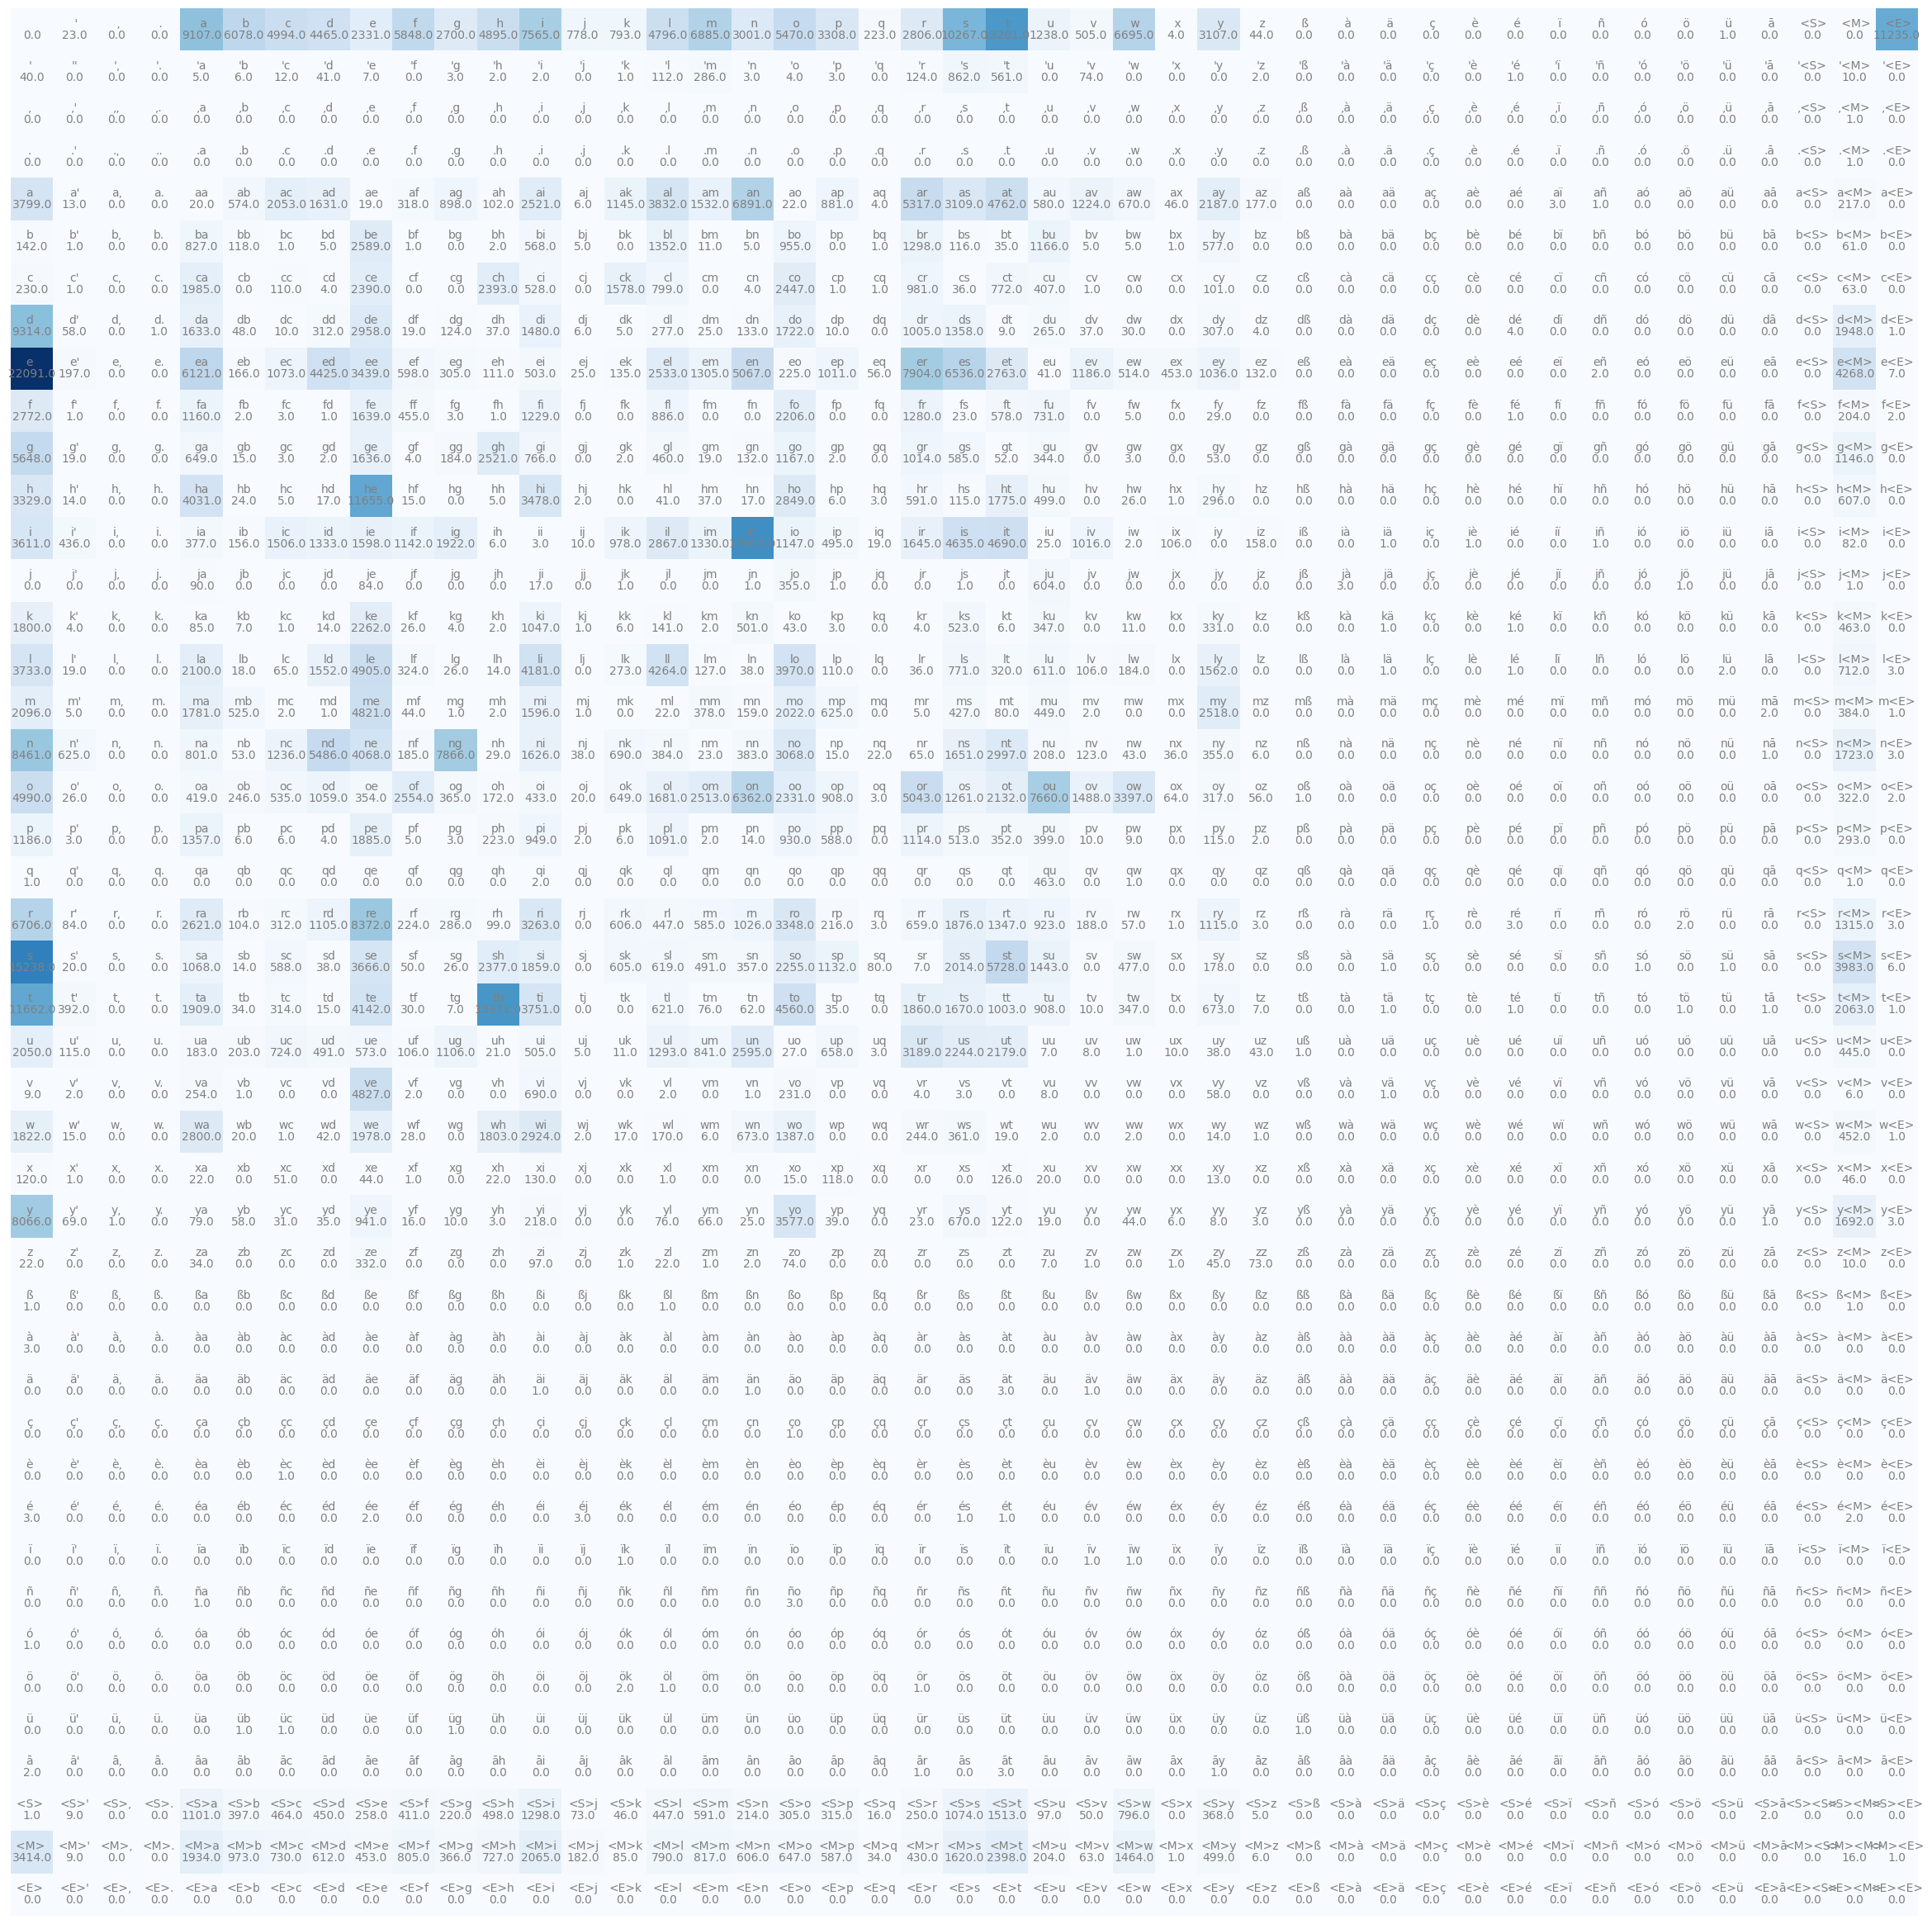

In [360]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(30, 30))
plt.imshow(N, cmap="Blues")
for i in range(45):
    for j in range(45):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off")

In [361]:
N[0].float()
p = N[0].float()
p /= p.sum()

In [362]:
p

tensor([0.0000e+00, 1.8797e-04, 0.0000e+00, 0.0000e+00, 7.4426e-02, 4.9672e-02,
        4.0813e-02, 3.6490e-02, 1.9050e-02, 4.7792e-02, 2.2065e-02, 4.0004e-02,
        6.1824e-02, 6.3581e-03, 6.4807e-03, 3.9195e-02, 5.6267e-02, 2.4525e-02,
        4.4703e-02, 2.7034e-02, 1.8224e-03, 2.2932e-02, 8.3906e-02, 1.0788e-01,
        1.0117e-02, 4.1271e-03, 5.4714e-02, 3.2690e-05, 2.5392e-02, 3.5959e-04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.1724e-06, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.1817e-02])

In [363]:
g = torch.Generator().manual_seed(44324243242)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [364]:
N

tensor([[0.0000e+00, 1.8797e-04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         9.1817e-02],
        [4.0000e+01, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.0000e+01,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        ...,
        [1.0000e+00, 9.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4140e+03, 9.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 1.6000e+01,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [365]:
P = (N).float()
P /= P.sum(dim=1, keepdim=True)

P.shape

torch.Size([45, 45])

In [366]:
P[0], P[0].sum()

(tensor([0.0000e+00, 1.8797e-04, 0.0000e+00, 0.0000e+00, 7.4426e-02, 4.9672e-02,
         4.0813e-02, 3.6490e-02, 1.9050e-02, 4.7792e-02, 2.2065e-02, 4.0004e-02,
         6.1824e-02, 6.3581e-03, 6.4807e-03, 3.9195e-02, 5.6267e-02, 2.4525e-02,
         4.4703e-02, 2.7034e-02, 1.8224e-03, 2.2932e-02, 8.3906e-02, 1.0788e-01,
         1.0117e-02, 4.1271e-03, 5.4714e-02, 3.2690e-05, 2.5392e-02, 3.5959e-04,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.1724e-06, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 9.1817e-02]),
 tensor(1.))

In [367]:
g = torch.Generator().manual_seed(44324243242)
for _ in range(10**2):
    ix = 0
    combine = []
    while True:
        # p = N[ix].float()
        # p /= p.sum()

        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        combine.append(itos[ix])
        if ix == 44:
            break

    print(''.join(combine))

cishin pr f at<M> brondstin amond<M>hqumind uthis be ha e sur grege betsp d smy oris ethof fo and gh<M> <E>
je eliswngholereclthee yse<M>frt moverye pald cong ous cre piscouththachaghext stid gouneann's n's p us calfenase smexhi inyoveam seronghy and the f bote oll<M>lifusuthigifl costeveralee<M>sitefat astce sski sted t<M>silouzen trespllath<M>lebemy<M>ivi wer <E>
forioss<M>wi merey swhanocavearesmblay w brns wi l therkupour t aldodetrrond h paispophinocrican<M>my thinit s nd win name ickeintong<M> py'se's my isteshaweas cemyolk fachis apaslluray aindsismorrmyliso my<M>stat'lafatapirelimo adr <E>
t is llan be<M>hee th a ce blese<M>aplke l owingetencreserind myoswhe if i s ans wand p n ly<M> ouncendofor<M>nd m ofuild kitism s <E>
whi s os<M> <E>
n aifoveeve ran s s gefll t de<M>fais bure sougingonf he<M>brine it<M>onin bly<M>ey<M>y outhe d<M>uthil andy ieme<M>ind meze linweand<M>inchoures st <E>
<E>
seleday f in tstsathouresn <E>
s my<M>wie whe boftely she rnde<M>hasthond s by<M>en d i

In [368]:
log_likelihood = 0
n = 0
for w in words:
    w = w.split("  ")
    chs = ["<S>"] + list(w[0]) + ["<M>"] + list(w[1])+ ["<M>"] + list(w[2]) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]

        prob = P[ix1, ix2]
        log_likelihood += prob.log()
        n += 1
        # print(f"{ch1} -> {ch2} : {prob}")

# print(-log_likelihood)
print(f"Loss on training set: {-log_likelihood / n}")

Loss on training set: 2.4684343338012695


### Goal here is to minimize average negative log likelihood, or maximize likelihood! Bigram models are not so great haha.

In [388]:
xs, ys = [], []
for w in words:
    w = w.split("  ")
    chs = ["<S>"] + list(w[0]) + ["<M>"] + list(w[1])+ ["<M>"] + list(w[2]) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        # print(ix1, ix2)
        # print(f"{ch1} -> {ch2} : {P[ix1, ix2]}")
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(num)

775953


In [389]:
g = torch.Generator().manual_seed(44324243242)
W = torch.randn((45, 45), generator=g, requires_grad=True)

In [390]:
import torch.nn.functional as F

losses = []
lamb = 0.01
learning_rate = 50
for i in range(100):
    
    xenc = F.one_hot(xs, num_classes=45).float()
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(num), ys].log().mean() + lamb * (W**2).mean()

    print(f"Step {i}; Loss: ", loss.item())
    W.grad = None
    loss.backward()

    losses.append(loss.item())

    W.data += -learning_rate * W.grad

Step 0; Loss:  4.105082988739014
Step 1; Loss:  3.79007625579834
Step 2; Loss:  3.559098720550537
Step 3; Loss:  3.392272472381592
Step 4; Loss:  3.268951654434204
Step 5; Loss:  3.1761772632598877
Step 6; Loss:  3.1042256355285645
Step 7; Loss:  3.046462297439575
Step 8; Loss:  2.9985573291778564
Step 9; Loss:  2.957873821258545
Step 10; Loss:  2.922805070877075
Step 11; Loss:  2.892263650894165
Step 12; Loss:  2.8654470443725586
Step 13; Loss:  2.841731071472168
Step 14; Loss:  2.8206207752227783
Step 15; Loss:  2.8017241954803467
Step 16; Loss:  2.7847254276275635
Step 17; Loss:  2.769364356994629
Step 18; Loss:  2.755427360534668
Step 19; Loss:  2.7427327632904053
Step 20; Loss:  2.7311301231384277
Step 21; Loss:  2.720489501953125
Step 22; Loss:  2.710700511932373
Step 23; Loss:  2.701669692993164
Step 24; Loss:  2.6933164596557617
Step 25; Loss:  2.685570478439331
Step 26; Loss:  2.678370714187622
Step 27; Loss:  2.671663522720337
Step 28; Loss:  2.665402412414551
Step 29; Loss: 

Text(0, 0.5, 'Loss')

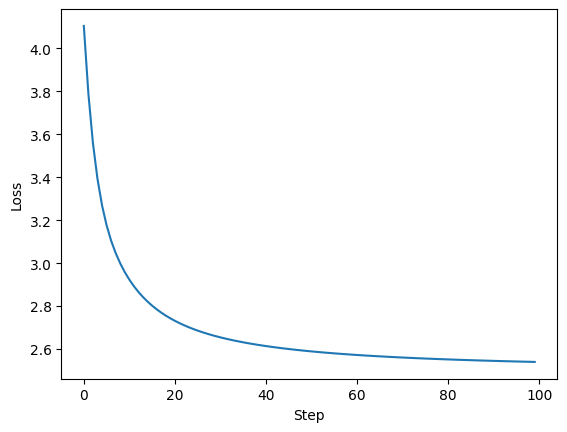

In [391]:
plt.plot(losses)
plt.xlabel("Step")
plt.ylabel("Loss")

### Pretty much the simimlar result as holding counts and probabilities in a lookup table. Since bigram is very simple, this works

In [392]:
# use the model to create some text
g = torch.Generator().manual_seed(44324243242)
for i in range(20):
    ix = 0
    combine = []
    while True:
        p = F.softmax(W[ix], dim=0)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        combine.append(itos[ix])
        if ix == 44:
            break

    print(''.join(combine).replace("<E>", "\n").replace("<M>", " ").replace("<S>", ""))

'my in pé f at  brondstin amond hqfourlinokis bt ha e sur greg,ñvethp d s t oris ethofwep and gh  

jr eliswvivljueclthee yse frt moverye pald cong ous cwe pkscouththachaghexmostid gouneann's n's p uacalfbun amemexfi inyoveam serongh band th'üïs whe oll lifusuthigifl costevçralee ieteat 

astce sskiā'sedénesiloèzöqqāwale dsth lebemàvivi wer 

forioss wi merey swhanocavearesmblay w brns wi l thérkipßcohe aldodetrrond h pandonpope crican myèñd tit s nd wghaname iceaintong  xy se's my isteshaweas cemyolk fachisxjpaslluray aindsismorrmyliso my statiouf.tapireléit adr 

t is llan be heñy f a ce blese aplke l owingetencr

serind myoswhe if i s ans wand p n ly öèqncendofor s wonofuildt itis f chemy s os xjn aifoveeve ran s s gefll t de fais bure sougingonf he brine it onin bly eyxy outhe d uthil andy ie s ind meze linwand 

whais tèkst 



seljuñy f in  çrsathouresn 

sóp

my heale boftel.thed rnde hasthond s by en d im mitfered d ot a achukóthowy co waceazcl shanhesorcon whatyoaié.jā'g tin b